<a href="https://colab.research.google.com/github/jblcky/retail-inventory-forecasting-2/blob/main/notebooks/eda_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/jblcky/retail-inventory-forecasting-2/refs/heads/main/data/processed/sales_df_fe.csv'
# Load processed file
sales_df = pd.read_csv(url, parse_dates=["date"])

Overall Sales Trend Over Time
- Why: Understand overall sales trends and spikes.

<ipython-input-3-17577a7443c9>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


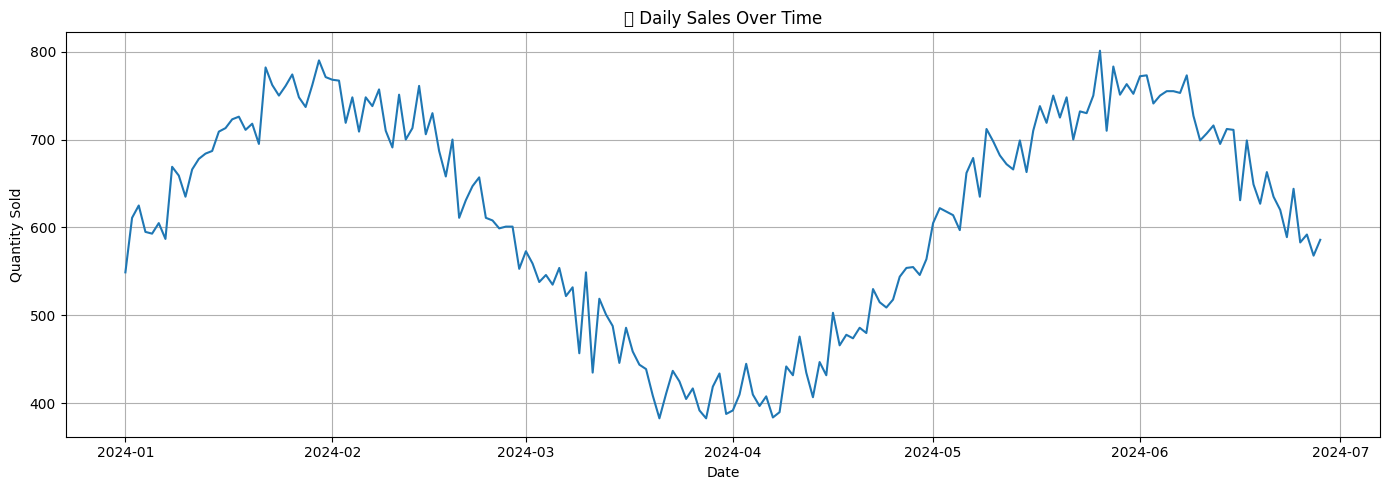

In [3]:
# Group total sales per day
daily_sales = sales_df.groupby('date')['quantity_sold'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_sales['date'], daily_sales['quantity_sold'], label='Total Daily Sales')
plt.title("📈 Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


Seasonality by Day of Week
- Why: Helps in adjusting forecasts by weekday patterns.

<ipython-input-4-425962befd85>:12: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


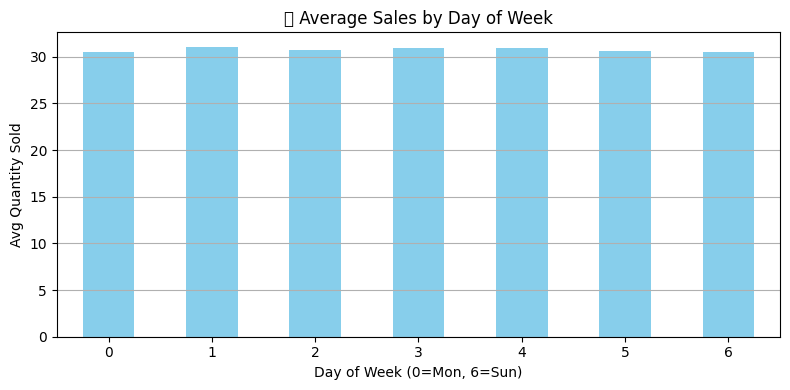

In [4]:
# Average sales by day of week
dow_sales = sales_df.groupby('day_of_week')['quantity_sold'].mean()

# Plot
plt.figure(figsize=(8, 4))
dow_sales.plot(kind='bar', color='skyblue')
plt.title("🗓️ Average Sales by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Avg Quantity Sold")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Sales Distribution by SKU
- Why: Identify best-sellers that need better forecasting/inventory.

<ipython-input-5-66d49289a898>:12: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


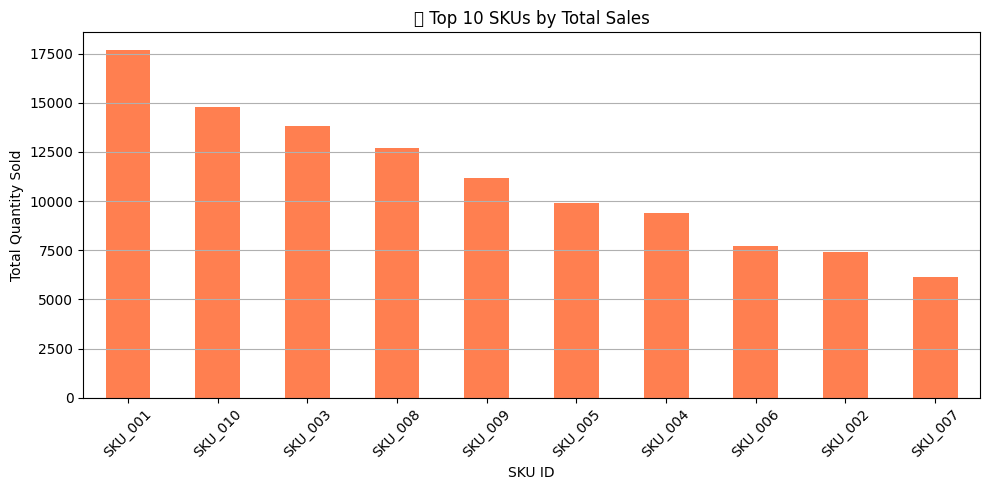

In [5]:
# Total sales per SKU
sku_sales = sales_df.groupby('sku_id')['quantity_sold'].sum().sort_values(ascending=False)

# Plot top 10 SKUs
plt.figure(figsize=(10, 5))
sku_sales.head(10).plot(kind='bar', color='coral')
plt.title("🔟 Top 10 SKUs by Total Sales")
plt.xlabel("SKU ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Compare Sales Trend for a Specific SKU Across Stores
- Why: Spot store-specific demand trends or differences.

<ipython-input-6-ad0de6fc7f2f>:17: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


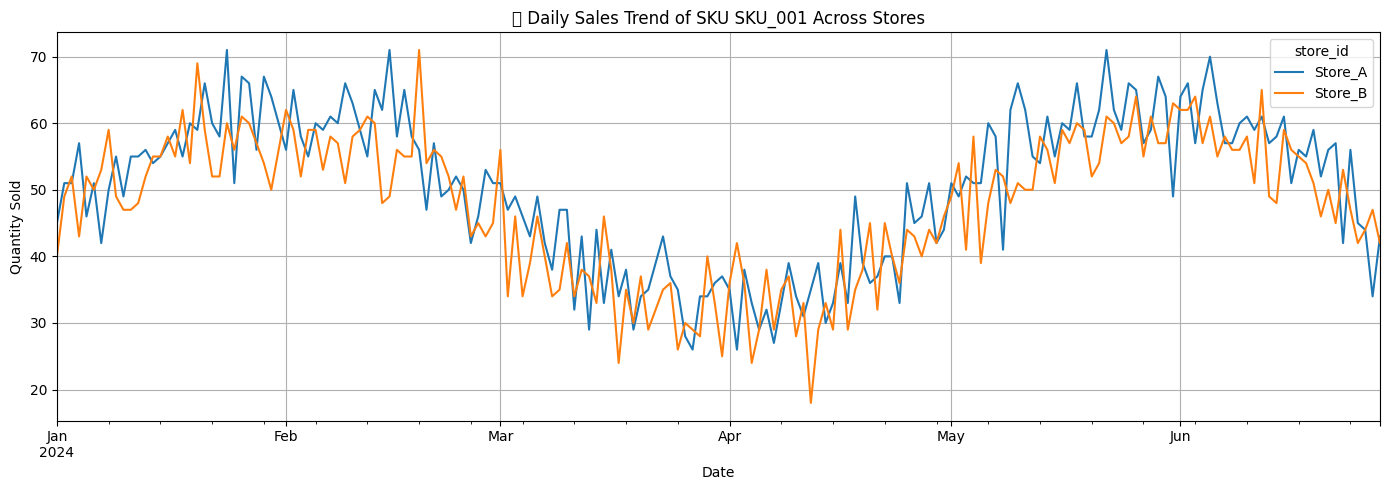

In [6]:
# Choose a SKU to compare
sku_to_plot = sales_df['sku_id'].unique()[0]

# Pivot for line plot
sku_store_trend = (
    sales_df[sales_df['sku_id'] == sku_to_plot]
    .groupby(['date', 'store_id'])['quantity_sold']
    .sum().unstack()
)

# Plot
sku_store_trend.plot(figsize=(14, 5))
plt.title(f"🏪 Daily Sales Trend of SKU {sku_to_plot} Across Stores")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


 Impact of Holidays or Flu Season
 - Why: Understand external event influence on demand.

In [7]:
# Compare avg sales on flu vs non-flu days
if 'event_flu_season' in sales_df.columns:
    flu_vs_nonflu = sales_df.groupby('event_flu_season')['quantity_sold'].mean()

    plt.figure(figsize=(6, 4))
    flu_vs_nonflu.plot(kind='bar', color=['lightgreen', 'salmon'])
    plt.title("😷 Average Sales on Flu vs Non-Flu Days")
    plt.xticks(ticks=[0, 1], labels=["No Flu", "Flu Season"], rotation=0)
    plt.ylabel("Avg Quantity Sold")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Advanced EDA Breakdown
- Sales Trends by Month and Year
- Spot macro-level seasonality like year-end or back-to-school sales.

<ipython-input-8-78745488e45b>:10: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


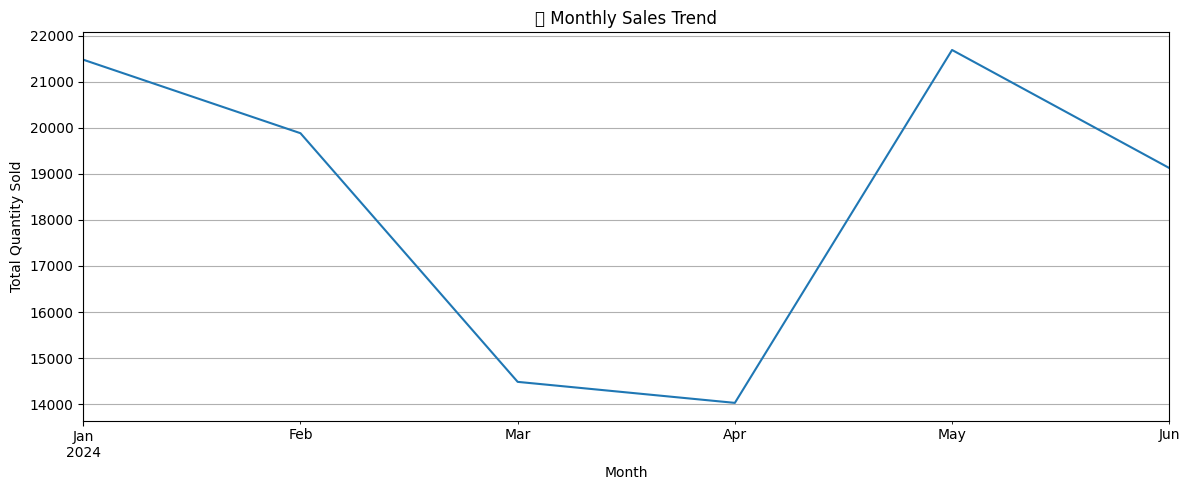

In [8]:
monthly_sales = sales_df.groupby(sales_df['date'].dt.to_period('M'))['quantity_sold'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title("📆 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


Heatmap of Sales by Day of Week vs. Month
- Great for seeing demand hotspots.

<ipython-input-9-c6859ee0b583>:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


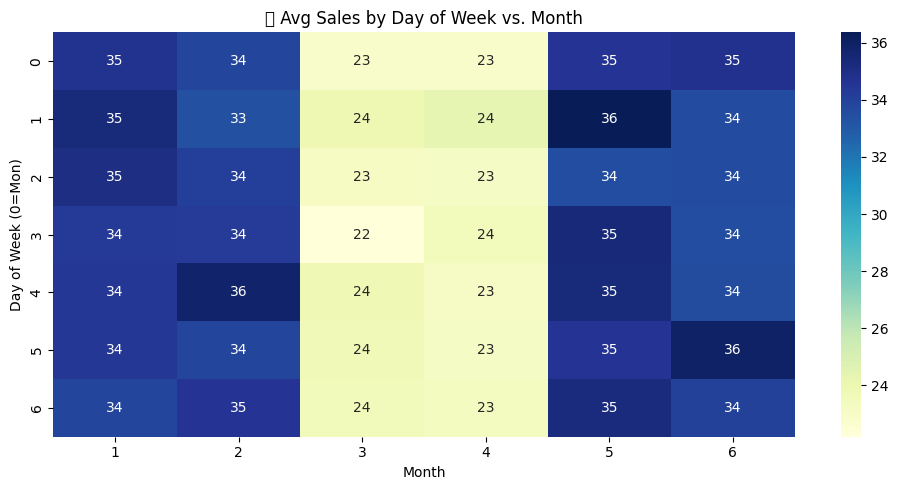

In [9]:
heatmap_data = sales_df.copy()
heatmap_data['month'] = heatmap_data['date'].dt.month

pivot_table = heatmap_data.pivot_table(
    index='day_of_week', columns='month', values='quantity_sold', aggfunc='mean'
)

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("🔥 Avg Sales by Day of Week vs. Month")
plt.xlabel("Month")
plt.ylabel("Day of Week (0=Mon)")
plt.tight_layout()
plt.show()


Top SKUs’ Sales Over Time
- Understand seasonality, promotions, or slowdowns in top SKUs.

<ipython-input-10-8ca9a41e98d9>:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


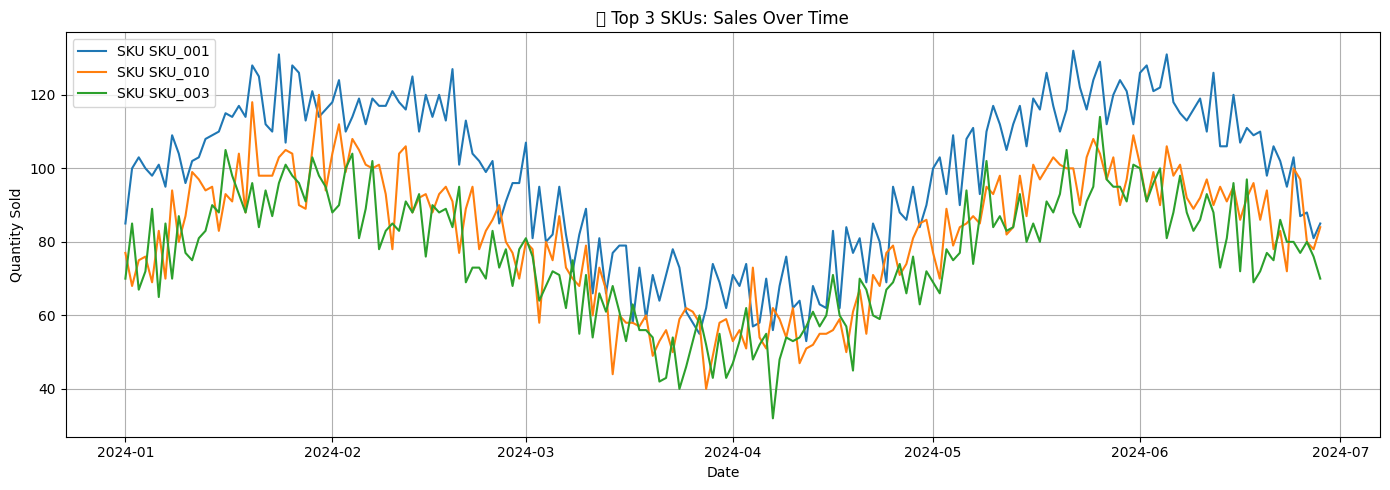

In [10]:
top_skus = sales_df.groupby('sku_id')['quantity_sold'].sum().nlargest(3).index

plt.figure(figsize=(14, 5))
for sku in top_skus:
    sku_ts = sales_df[sales_df['sku_id'] == sku].groupby('date')['quantity_sold'].sum()
    plt.plot(sku_ts, label=f'SKU {sku}')

plt.title("📦 Top 3 SKUs: Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Store-level Demand Variability
- Helps identify stores with unstable or hard-to-predict demand.

<ipython-input-11-8f21258a1b86>:9: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


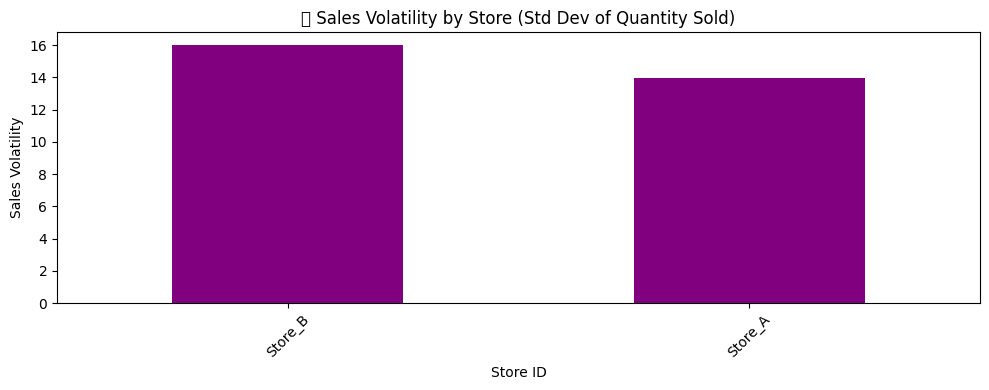

In [11]:
store_variance = sales_df.groupby('store_id')['quantity_sold'].std().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
store_variance.plot(kind='bar', color='purple')
plt.title("🏪 Sales Volatility by Store (Std Dev of Quantity Sold)")
plt.xlabel("Store ID")
plt.ylabel("Sales Volatility")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Rolling Sales Patterns (Lag Insight)
 - Shows short-term demand trends and stock planning needs.

<ipython-input-12-3ac74eb78ec2>:18: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


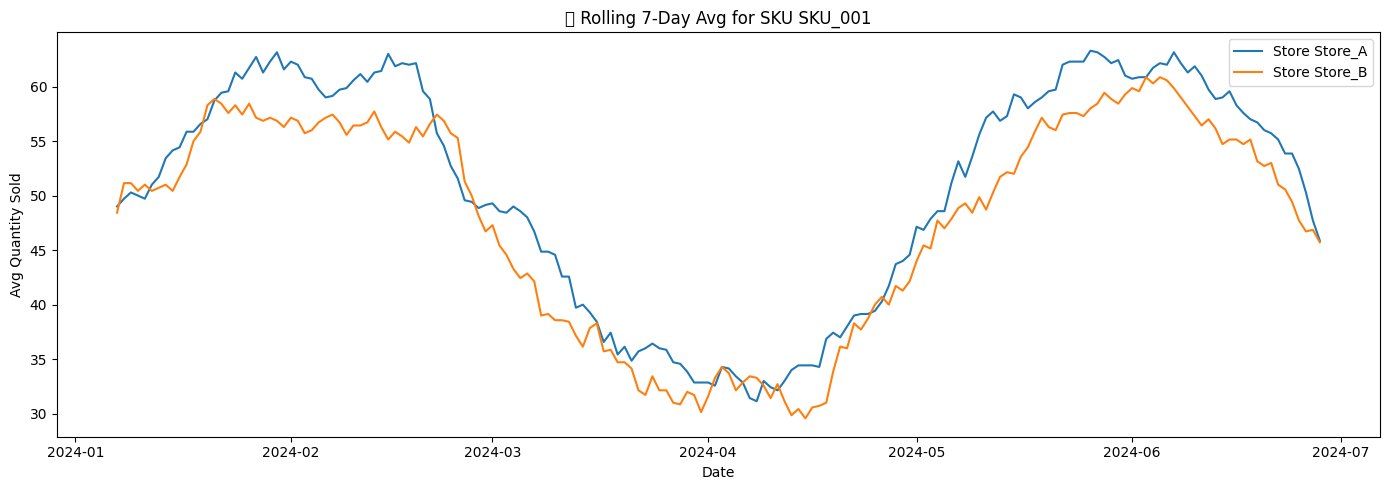

In [12]:
sku_to_plot = sales_df['sku_id'].unique()[0]
sku_df = sales_df[sales_df['sku_id'] == sku_to_plot].copy()
sku_df = sku_df.sort_values('date')

sku_df['rolling_7d'] = sku_df.groupby('store_id')['quantity_sold'].transform(
    lambda x: x.rolling(7).mean()
)

plt.figure(figsize=(14, 5))
for store_id in sku_df['store_id'].unique():
    store_data = sku_df[sku_df['store_id'] == store_id]
    plt.plot(store_data['date'], store_data['rolling_7d'], label=f'Store {store_id}')

plt.title(f"🌀 Rolling 7-Day Avg for SKU {sku_to_plot}")
plt.xlabel("Date")
plt.ylabel("Avg Quantity Sold")
plt.legend()
plt.tight_layout()
plt.show()


Summary of What You've Gained
- monthly sales trend, insight macro seasonality
- heatmap, insight weekly & monthly pattern
- top sku trend, insight product specific seasonality
- store variability, insight inventory allocation planning
- rolling average, lagged demand signals for forecasting